<a href="https://colab.research.google.com/github/singh-priyanshi/py/blob/main/CSV_Processing_Exercise_(Summer_2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instructions

Each of these challenges provides a different CSV formatted dataset. Write Python code to process each file and answer the respective questions about the data contained within.



# References

You will find the following reference material directly helpful in completing this exercise.

Working with CSV files:

  + [`pandas.read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
  + [`pandas.DataFrame`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):
    + [`pandas.DataFrame.iterrows()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html)
    + [`pandas.DataFrame.groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
  + [`pandas.Series`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html):
    + [`pandas.Series.map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)
    + [`pandas.Series.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html)
  + [`pandas.pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html)



    




# Challenges

## Challenge 1 (Gradebook)


Given the provided "gradebook.csv" file, write Python code to read the CSV data and perform each of the following tasks...

A) Print the **column names** (i.e. `['student_id', 'final_grade']`).

B) Print the **number of students** / rows (i.e. `10`).

C) Print the **average grade** (i.e. `83.64`).

D) Print the **median grade** (i.e. ` 87.6`).

E) Create another column on the DataFrame called "letter_grade", and use a custom function to assign each numeric score a corresponding **letter grade**.

> HINT: use the Series object's `apply()` or `map()` method


F) Print the **percentage of students who got each letter grade**.

> HINT: use the Series object's `value_counts()` method

In [ ]:
from pandas import read_csv

#
# GRADEBOOK
#

#df = read_csv("gradebook.csv")
df = read_csv("https://raw.githubusercontent.com/prof-rossetti/intro-to-python/master/data/gradebook.csv")

print(df.head())

   student_id  final_grade
0           1         76.7
1           2         85.1
2           3         50.3
3           4         89.8
4           5         97.4


In [ ]:

# HERE IS AN EXAMPLE FUNCTION TO USE FOR LETTER GRADE CONVERSION (FEEL FREE TO REVISE AS DESIRED)

def calculate_grade(score):
    if score >= 75.0:
        grade = "Pass"
    else:
        grade = "Fail"
    return grade


# example invocations:
print(calculate_grade(50))
print(calculate_grade(90))

Fail
Pass


my:

In [1]:
import pandas as pd
import requests
from io import StringIO

# Load the CSV data from the provided URL
url = "https://raw.githubusercontent.com/prof-rossetti/intro-to-python/master/data/gradebook.csv"
response = requests.get(url)
data = StringIO(response.text)

# Read the CSV data into a DataFrame
df = pd.read_csv(data)

In [2]:
# A) Print column names
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['student_id', 'final_grade']


In [3]:
# B) Print number of students / rows
num_students = df.shape[0]
print("Number of students:", num_students)

Number of students: 10


In [4]:
# C) Print average grade
average_grade = df['final_grade'].mean()
print("Average grade:", round(average_grade, 2))

Average grade: 83.64


In [5]:
# D) Print median grade
median_grade = df['final_grade'].median()
print("Median grade:", median_grade)

Median grade: 87.6


In [7]:
# E) Create "letter_grade" column
def assign_letter_grade(score):
    if score >= 90:
        return 'A'
    elif score >= 80:
        return 'B'
    elif score >= 70:
        return 'C'
    elif score >= 60:
        return 'D'
    else:
        return 'F'

df['letter_grade'] = df['final_grade'].apply(assign_letter_grade)

In [8]:
# F) Print percentage of students who got each letter grade
letter_grade_counts = df['letter_grade'].value_counts(normalize=True) * 100
print("Percentage of students who got each letter grade:")
print(letter_grade_counts)

# Print the first few rows of the DataFrame
print(df.head())

Percentage of students who got each letter grade:
B    40.0
A    30.0
C    20.0
F    10.0
Name: letter_grade, dtype: float64
   student_id  final_grade letter_grade
0           1         76.7            C
1           2         85.1            B
2           3         50.3            F
3           4         89.8            B
4           5         97.4            A


## Challenge 2 (Products)

Given the provided "products.csv" file, write Python code to read the CSV data and perform each of the following tasks...

A) Print the **number of products** (rows) (i.e. `20`).

B) Print the **columns** (i.e. `['id', 'name', 'aisle', 'department', 'price']`).

C) Loop through each of the rows and **print the name and price of each product**. Use the provided `to_usd` function to format prices as USD with dollar sign and two decimal places.


In [ ]:

# HERE IS A PRICE FORMATTING FUNCTION FOR YOU TO USE

def to_usd(my_price):
    """
        Converts a numeric value to USD-formatted string, for printing and display purposes.
        Adds dollar sign and commas for the thousands separator.
        Rounds to two decimal places.

        Param: my_price (int or float or str) like 4000.444444 or "4000.444444"

        Example: to_usd(4000.444444)

        Returns: $4,000.44
    """
    return f"${float(my_price):,.2f}"


# example invocations:
print(to_usd(4.5))
print(to_usd(1234567890.12345))

$4.50
$1,234,567,890.12


In [ ]:
#
# PRODUCTS
#

from pandas import read_csv

#df = read_csv("products.csv")
df = read_csv("https://raw.githubusercontent.com/prof-rossetti/intro-to-python/master/data/products.csv")

print(df.head())

   id                                               name  \
0   1                         Chocolate Sandwich Cookies   
1   2                                   All-Seasons Salt   
2   3               Robust Golden Unsweetened Oolong Tea   
3   4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4   5                          Green Chile Anytime Sauce   

                        aisle department  price  
0               cookies cakes     snacks   3.50  
1           spices seasonings     pantry   4.99  
2                         tea  beverages   2.49  
3                frozen meals     frozen   6.99  
4  marinades meat preparation     pantry   7.99  


MY:

In [9]:
import pandas as pd

# Read the CSV file from the URL
df = pd.read_csv("https://raw.githubusercontent.com/prof-rossetti/intro-to-python/master/data/products.csv")

# A) Print the number of products (rows)
num_products = len(df)
print("Number of products:", num_products)




Number of products: 20


In [10]:
# B) Print the columns
columns = df.columns.tolist()
print("Columns:", columns)



Columns: ['id', 'name', 'aisle', 'department', 'price']


In [14]:
# C) Loop through each row and print name and price using the to_usd function
def to_usd(price):
    return "${:.2f}".format(price)

print("Name\tPrice")
print("---------------------------")
for index, row in df.iterrows():
    product_name = row["name"]
    product_price = row["price"]
    formatted_price = to_usd(product_price)
    print(f"{product_name} = ({formatted_price})")

Name	Price
---------------------------
Chocolate Sandwich Cookies = ($3.50)
All-Seasons Salt = ($4.99)
Robust Golden Unsweetened Oolong Tea = ($2.49)
Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce = ($6.99)
Green Chile Anytime Sauce = ($7.99)
Dry Nose Oil = ($21.99)
Pure Coconut Water With Orange = ($3.50)
Cut Russet Potatoes Steam N' Mash = ($4.25)
Light Strawberry Blueberry Yogurt = ($6.50)
Sparkling Orange Juice & Prickly Pear Beverage = ($2.99)
Peach Mango Juice = ($1.99)
Chocolate Fudge Layer Cake = ($18.50)
Saline Nasal Mist = ($16.00)
Fresh Scent Dishwasher Cleaner = ($4.99)
Overnight Diapers Size 6 = ($25.50)
Mint Chocolate Flavored Syrup = ($4.50)
Rendered Duck Fat = ($9.99)
Pizza for One Suprema  Frozen Pizza = ($12.50)
Gluten Free Quinoa Three Cheese & Mushroom Blend = ($3.99)
Pomegranate Cranberry & Aloe Vera Enrich Drink = ($4.25)


## Challenge 3 (Monthly Sales)

**bold text**
Given the provided `sales_df` variable representing monthly retail sales, write Python code to read the CSV data and perform each of the following tasks...


A) What is the **structure** of this data. In other words, we have a "row per what?" Describe your answer in words.


B) How many **unique products** are sold (i.e. `7`), and what are their names? Print the list of unique products in alphabetical order (i.e. `['Baseball Cap', 'Brown Boots', 'Button-Down Shirt', 'Khaki Pants', 'Sticker Pack', 'Super Soft Hoodie', 'Vintage Logo Tee']`).

C) Print the **total monthly sales**, formatted as USD (i.e. `"$12,000.71"`).


D) Calculate the **total sales for each day**, and create a bar or line chart depicting the sales over time. Optionally  also print which five dates have the most sales.



<img src="https://user-images.githubusercontent.com/1328807/211162483-1418bd1c-7e43-42bc-b2c4-b5c24e242f0a.png" height="300"/>




E) Determine the **total sales for each product**, and create a horizontal bar chart to show the top selling products, with the bars sorted in descending order of their length.




<img src="https://user-images.githubusercontent.com/1328807/211162481-07593a51-57f9-4bfd-ab14-f0878d8bc960.png" height="300"/>






In [ ]:
#
# MONTHLY SALES
#

month = "201803"
sales_df = read_csv(f"https://raw.githubusercontent.com/prof-rossetti/data-analytics-in-python/main/data/unit-2/monthly-sales/sales-{month}.csv")
sales_df.head()

,date,product,unit price,units sold,sales price
0,2018-03-01,Button-Down Shirt,65.05,2,130.10
1,2018-03-01,Vintage Logo Tee,15.95,1,15.95
2,2018-03-01,Sticker Pack,4.50,1,4.50
3,2018-03-02,Super Soft Hoodie,75.00,2,150.00
4,2018-03-02,Button-Down Shirt,65.05,7,455.35


Answer for A (fill in blanks):

Looks like we have a row per _____________ per __________.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# A) Read the CSV data
month = "201803"
sales_df = pd.read_csv(f"https://raw.githubusercontent.com/prof-rossetti/data-analytics-in-python/main/data/unit-2/monthly-sales/sales-{month}.csv")
sales_df.head()


,date,product,unit price,units sold,sales price
0,2018-03-01,Button-Down Shirt,65.05,2,130.10
1,2018-03-01,Vintage Logo Tee,15.95,1,15.95
2,2018-03-01,Sticker Pack,4.50,1,4.50
3,2018-03-02,Super Soft Hoodie,75.00,2,150.00
4,2018-03-02,Button-Down Shirt,65.05,7,455.35


In [21]:
# B) Unique products and their names
unique_products = sales_df['product'].unique()
unique_products.sort()
print("Unique products:", unique_products)



Unique products: ['Baseball Cap' 'Brown Boots' 'Button-Down Shirt' 'Khaki Pants'
 'Sticker Pack' 'Super Soft Hoodie' 'Vintage Logo Tee']


In [30]:
# C) Total monthly sales
total_monthly_sales = sales_df['sales price'].sum()
formatted_total_monthly_sales = "${:,.2f}".format(total_monthly_sales)
print("Total monthly sales:", formatted_total_monthly_sales)


Total monthly sales: $12,000.71


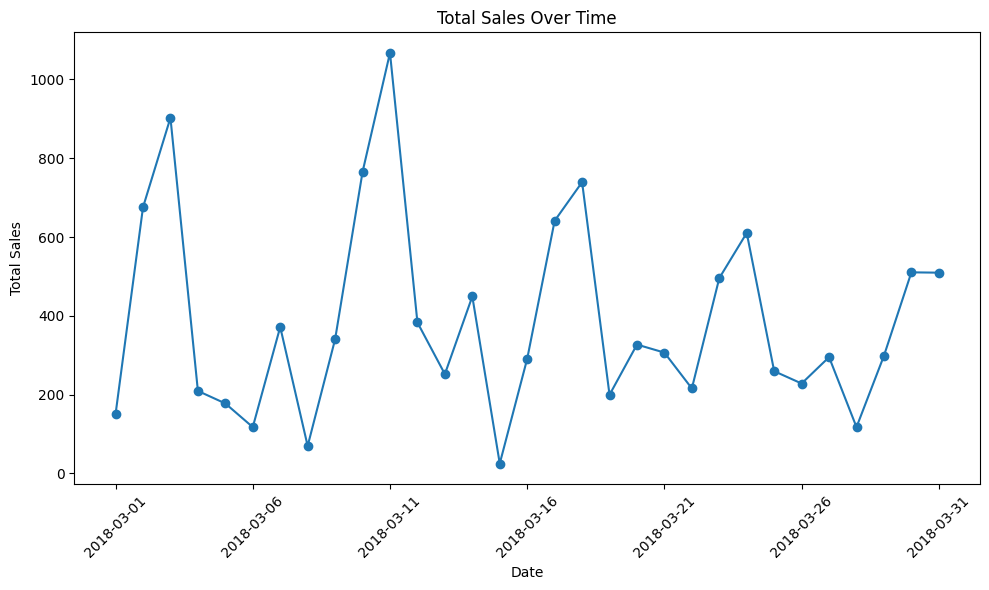

Dates with the most sales: ['2018-03-11', '2018-03-03', '2018-03-10', '2018-03-18', '2018-03-02']


In [32]:
# D) Total sales for each day and chart
daily_sales = sales_df.groupby('date')['sales price'].sum()
top_dates = daily_sales.nlargest(5)
top_dates_list = top_dates.index.tolist()

plt.figure(figsize=(10, 6))
daily_sales.plot(kind='line', marker='o')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("Dates with the most sales:", top_dates_list)



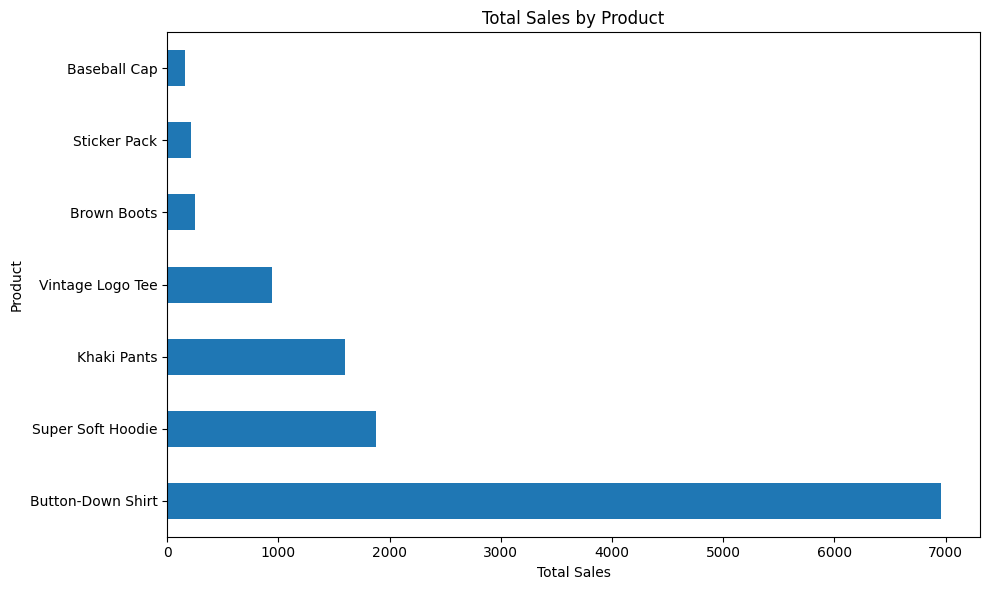

In [33]:
# E) Total sales for each product and chart
product_sales = sales_df.groupby('product')['sales price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
product_sales.plot(kind='barh')
plt.title('Total Sales by Product')
plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.tight_layout()

plt.show()

## Challenge 4 (Albums)


Given the provided "albums.csv" file, write Python code to read the CSV data and perform each of the following tasks...

> artist_id | artist_name | album_id | album_title
> --- | ---  | ---  | ---
> 1 | AC/DC | 1 | For Those About To Rock We Salute You
> 1 | AC/DC | 4 | Let There Be Rock
> 3 | Aerosmith | 5 | Big Ones
> 4 | Alanis Morissette | 6 | Jagged Little Pill
> 68 | Miles Davis | 48 | The Essential Miles Davis [Disc 1]
> 68 | Miles Davis | 49 | The Essential Miles Davis [Disc 2]
> 59 | Santana | 197 | Santana - As Years Go By
> 59 | Santana | 198 | Santana Live



A) Print a list of the CSV file's **column names** (i.e. `['artist_id', 'artist_name', 'album_id', 'album_title']`).

B) Print the **number of rows** in the CSV file, excluding the header row (i.e. `347`).

C) Assuming each "artist_id" represents a unique artist, print the **number of unique artists** (i.e. `204`).

D) Assuming each "album_id" represents a unique album, identify **which five artists have the most albums**, and print that artist's name and corresponding album count

> FYI: the following table depicts the top five artists by album count...
>
> | artist_name   | album_count |
> |---------------|----------|
> | Iron Maiden   | 21       |
> | Led Zeppelin  | 14       |
> | Deep Purple   | 11       |
> | Metallica     | 10       |
> | U2            | 10       |




In [ ]:

#
# ALBUMS
#

df = read_csv("https://gist.githubusercontent.com/s2t2/f2b01347c06258cad28e7331f1e9320f/raw/b61ea33cd18aaadf885eb04544d921c9d9445e21/albums.csv")
print(df.head())

   artist_id artist_name  album_id                            album_title
0          1       AC/DC         1  For Those About To Rock We Salute You
1          2      Accept         2                      Balls to the Wall
2          2      Accept         3                      Restless and Wild
3          1       AC/DC         4                      Let There Be Rock
4          3   Aerosmith         5                               Big Ones


MY:


In [37]:
import pandas as pd
import requests
from collections import Counter

# Read the CSV file from the URL
url = "https://gist.githubusercontent.com/s2t2/f2b01347c06258cad28e7331f1e9320f/raw/b61ea33cd18aaadf885eb04544d921c9d9445e21/albums.csv"
df = pd.read_csv(url)


In [38]:
# A) Print column names
column_names = df.columns.tolist()
print("Column names:", column_names)

Column names: ['artist_id', 'artist_name', 'album_id', 'album_title']


In [39]:

# B) Print number of rows
num_rows = len(df)
print("Number of rows:", num_rows)

Number of rows: 347


In [40]:
# C) Print number of unique artists
num_unique_artists = df['artist_id'].nunique()
print("Number of unique artists:", num_unique_artists)

Number of unique artists: 204


In [42]:
# D) Top five artists by album count
artist_album_count = df.groupby('artist_id')['album_id'].nunique()
top_artists = artist_album_count.nlargest(5)
top_artist_ids = top_artists.index.tolist()
top_artist_names = df[df['artist_id'].isin(top_artist_ids)]['artist_name'].unique()

print("Top five artists by album count:")
for artist_id, album_count in top_artists.items():
    artist_name = df[df['artist_id'] == artist_id]['artist_name'].iloc[0]
    print(f"{artist_name}: {album_count}")

# Display the first few rows of the DataFrame


Top five artists by album count:
Iron Maiden: 21
Led Zeppelin: 14
Deep Purple: 11
Metallica: 10
U2: 10


In [43]:
print(df.head())

   artist_id artist_name  album_id                            album_title
0          1       AC/DC         1  For Those About To Rock We Salute You
1          2      Accept         2                      Balls to the Wall
2          2      Accept         3                      Restless and Wild
3          1       AC/DC         4                      Let There Be Rock
4          3   Aerosmith         5                               Big Ones
